In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
class Bandits:
    def __init__(self, n_arms, n_trials):
        self.n_arms = n_arms
        self.n_trials = n_trials

    def generate_bandits(self):
        """A function to generate the bandits with random quality and variance"""
        self.Bandit_quality = np.random.randint(0, 10, self.n_arms).reshape(self.n_arms, 1)
        self.Bandit_variance = np.random.randint(low=1, high=7, size=self.n_arms).reshape(self.n_arms, 1)
    
    def generate_rewards(self):
        """A function to generate the rewards for the bandits"""
        self.generate_bandits()
        self.rewards_over_time = np.random.normal(self.Bandit_quality, self.Bandit_variance, (self.n_arms, self.n_trials))
        return self.rewards_over_time

In [163]:
class EpsilonGreedy:
    """ An epsilon-greedy agent from www.geeksforgeeks.org"""
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm is pulled
        self.values = np.zeros(n_arms)  # Estimated values of each arm

    def select_arm(self):
        """ Select the arm with the highest estimated value with probability 1 - epsilon"""
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        """ Update the estimated value of the chosen arm """
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

In [164]:
class UCB:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm is pulled
        self.values = np.zeros(n_arms)  # Estimated values of each arm
        self.upper_bounds = np.zeros(n_arms)

    def select_arm(self):
        total_counts = np.sum(self.counts)
        
        if total_counts < self.n_arms:
            # Select each arm at least once
            return int(total_counts)
        
        # Otherwise, calculate UCB for each arm
        r = self.values / self.counts
        delta = np.sqrt((1.5 * np.log(total_counts)) / self.counts)
        self.upper_bounds = r + delta

        # Select the arm with the highest upper confidence bound
        return np.argmax(self.upper_bounds)

    def update(self, chosen_arm, reward):
        """ Update the estimated value of the chosen arm """
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward


In [165]:
# Create Bandits
n_arms = 5
epsilon = 0.1
n_trials = 10000

Bandit = Bandits(n_arms, n_trials)
rewards_over_time = Bandit.generate_rewards()

In [166]:
# Execute EpsilonGreedy 
agent = EpsilonGreedy(n_arms, epsilon)
total_reward = 0
EpsilonGreedy_rewards = []

for t in range(n_trials):
    arm = agent.select_arm()
    reward = rewards_over_time[arm, t]
    agent.update(arm, reward)
    total_reward += reward
    EpsilonGreedy_rewards.append(total_reward)

print("Total Reward:", total_reward)

Total Reward: 76801.90921705584


In [167]:
# Execute UCB
agent = UCB(n_arms, epsilon)
total_reward = 0
UCB_rewards = []
for t in range(n_trials):
    arm = agent.select_arm()
    reward = rewards_over_time[arm, t]
    agent.update(arm, reward)
    total_reward += reward
    UCB_rewards.append(total_reward)

print("Total Reward:", total_reward)

Total Reward: 50197.262513976624


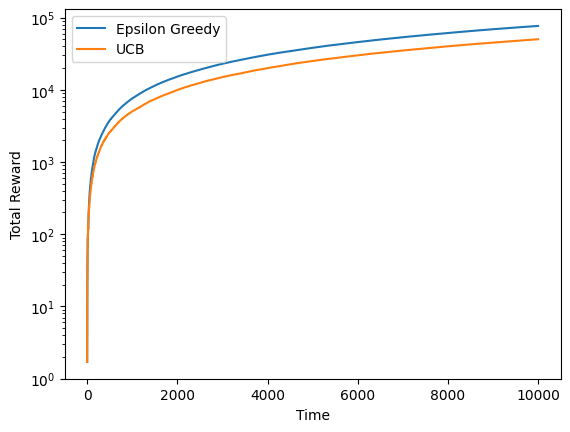

In [168]:
# Plot the rewards over time with log scale
plt.plot(EpsilonGreedy_rewards, label="Epsilon Greedy")
plt.plot(UCB_rewards, label="UCB")
plt.yscale("log")
plt.xlabel("Time")
plt.ylabel("Total Reward")
plt.legend()
plt.show()